https://mp.weixin.qq.com/s?__biz=MzIyNjM2MzQyNg==&mid=2247517999&idx=1&sn=d2b279de42391df4b3acfca3a1088fed&chksm=e8735662df04df74c9409f9229c6dbe5a4f6bcdda81fe31274633575e3104c7d77248ab58cf4&mpshare=1&scene=1&srcid=0729pfeL19YBn8cUMzrrLadn&sharer_sharetime=1596030216588&sharer_shareid=63238a347b4d0cfd29d21f1e461eeead&key=ebbd83891f2360c893883ab603ed0b01795ebecc22980bf28e7754e94b2f1054c92a01df37f9bcd609e597c8d1afc34369e8fa0542b2e9441dbfc1afb3e1c86b34237971135a904d2dec3dccd3fc42ac&ascene=1&uin=MjA1MjAyODkxNg%3D%3D&devicetype=Windows+10+x64&version=62090529&lang=zh_CN&exportkey=AWkLIZSu7ioJDBktK51AlCw%3D&pass_ticket=JKiw6%2BeezAK87mUJas9boUHp9aMUHMY3cwKfjt3VoY8BAiqNZBqk9hP4AXUTk0QS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import scipy
from collections import Counter

C:\Users\jianghaitao1\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\jianghaitao1\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
C:\Users\jianghaitao1\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\jianghaitao1\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\.libs\libopenblas.txa6yqsd3gcqqc22geq54j2udcxdxhwn.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
df_train = pd.read_csv('../../dataset/tainchi_nlp/train_set.csv', sep='\t')
df_test = pd.read_csv('../../dataset/tainchi_nlp/test_a.csv', sep='\t')

In [3]:
df_train.head()

,label,text
0,2,2967 6758 339 2021 1854 3731 4109 3792 4149 15...
1,11,4464 486 6352 5619 2465 4802 1452 3137 5778 54...
2,3,7346 4068 5074 3747 5681 6093 1777 2226 7354 6...
3,2,7159 948 4866 2109 5520 2490 211 3956 5520 549...
4,3,3646 3055 3055 2490 4659 6065 3370 5814 2465 5...


In [4]:
# 长度分布
def split_df(df_row):
    return len(str(df_row).split())
len_dist = np.vectorize(split_df)(df_train['text'])
len_test_dist = np.vectorize(split_df)(df_test['text'])

In [8]:
print(pd.Series(len_dist).describe())

count    200000.000000
mean        907.207110
std         996.029036
min           2.000000
25%         374.000000
50%         676.000000
75%        1131.000000
max       57921.000000
dtype: float64


In [9]:
print(pd.Series(len_test_dist).describe())

count    50000.000000
mean       909.844960
std       1032.313375
min         14.000000
25%        370.000000
50%        676.000000
75%       1133.000000
max      41861.000000
dtype: float64


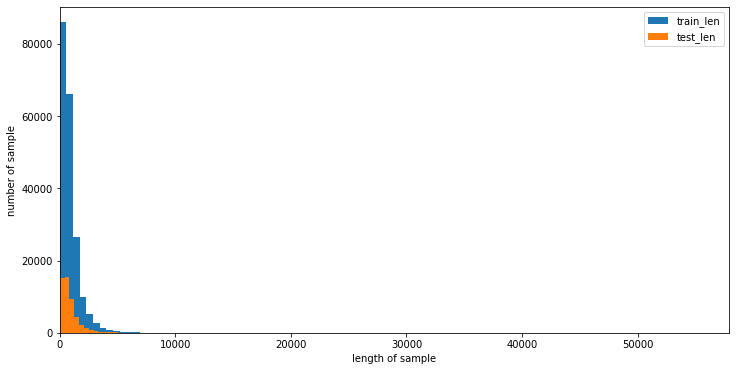

In [10]:
fig,ax = plt.subplots(1,1,figsize=(12,6))
ax = plt.hist(x=len_dist,bins=100)
ax = plt.hist(x=len_test_dist,bins=100)
plt.xlim([0, max(max(len_dist), max(len_test_dist))])
plt.xlabel("length of sample")
plt.ylabel("number of sample")
plt.legend(['train_len','test_len'])
plt.show()

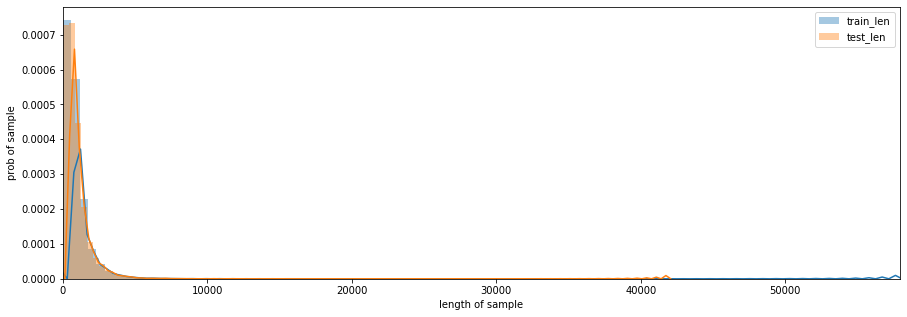

In [11]:
 plt.figure(figsize=(15,5))
ax = sns.distplot(len_dist, bins=100)
ax = sns.distplot(len_test_dist, bins=100)
plt.xlim([0, max(max(len_dist), max(len_test_dist))])
plt.xlabel("length of sample")
plt.ylabel("prob of sample")
plt.legend(['train_len','test_len'])

In [13]:
# 同分布验证
import scipy
print(scipy.stats.ks_2samp(len_dist,len_test_dist))

Ks_2sampResult(statistic=0.004049999999999998, pvalue=0.5279614323123156)


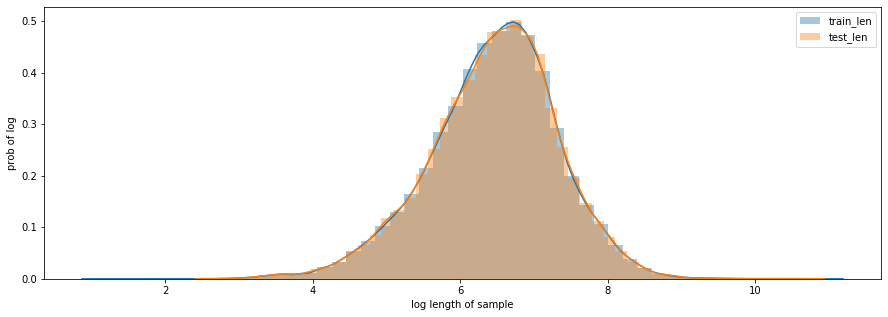

In [14]:
log_len_dist = np.log(1 + len_dist)
log_len_test_dist = np.log(1 + len_test_dist)
plt.figure(figsize=(15,5))
ax = sns.distplot(log_len_dist)
ax = sns.distplot(log_len_test_dist)
plt.xlabel("log length of sample")
plt.ylabel("prob of log")
plt.legend(['train_len','test_len'])

In [15]:
_,lognormal_ks_pvalue = scipy.stats.kstest(rvs=log_len_dist,cdf='norm')
print('P value is ', lognormal_ks_pvalue)

P value is  0.0


In [16]:
trans_data,lam = scipy.stats.boxcox(len_dist + 1)
print(scipy.stats.normaltest(trans_data))

NormaltestResult(statistic=1347.793358118494, pvalue=2.1398873511704724e-293)


In [17]:
df_train['text_split'] = df_train['text'].apply(lambda x:x.split())
df_train['len'] = df_train['text'].apply(lambda x:len(x.split()))
df_train['first_char'] = df_train['text_split'].apply(lambda x:x[0])
df_train['last_char'] = df_train['text_split'].apply(lambda x:x[-1])
df_train['most_freq'] = df_train['text_split'].apply(lambda x:np.argmax(np.bincount(x)))
df_train.head()

,label,text,text_split,len,first_char,last_char,most_freq
0,2,2967 6758 339 2021 1854 3731 4109 3792 4149 15...,"[2967, 6758, 339, 2021, 1854, 3731, 4109, 3792...",1057,2967,1635,3750
1,11,4464 486 6352 5619 2465 4802 1452 3137 5778 54...,"[4464, 486, 6352, 5619, 2465, 4802, 1452, 3137...",486,4464,900,3750
2,3,7346 4068 5074 3747 5681 6093 1777 2226 7354 6...,"[7346, 4068, 5074, 3747, 5681, 6093, 1777, 222...",764,7346,57,3750
3,2,7159 948 4866 2109 5520 2490 211 3956 5520 549...,"[7159, 948, 4866, 2109, 5520, 2490, 211, 3956,...",1570,7159,2662,3750
4,3,3646 3055 3055 2490 4659 6065 3370 5814 2465 5...,"[3646, 3055, 3055, 2490, 4659, 6065, 3370, 581...",307,3646,1635,3055


In [18]:
df_train_info = pd.DataFrame(columns=['count','len_mean','len_std','len_min','len_max','freq_fc','freq_lc','freq_freq'])
for name,group in df_train.groupby('label'):
    count = len(group) # 该类别新闻数
    len_mean = np.mean(group['len']) # 该类别长度平均值
    len_std = np.std(group['len']) # 长度标准差
    len_min = np.min(group['len']) # 最短的新闻长度
    len_max = np.max(group['len']) # 最长的新闻长度
    freq_fc = np.argmax(np.bincount(group['first_char'])) # 最频繁出现的首词
    freq_lc = np.argmax(np.bincount(group['last_char'])) # 最频繁出现的末词
    freq_freq = np.argmax(np.bincount(group['most_freq'])) # 该类别最频繁出现的词
    df_train_info.loc[name] = [count,len_mean,len_std,len_min,len_max,freq_fc,freq_lc,freq_freq]
df_train_info

,count,len_mean,len_std,len_min,len_max,freq_fc,freq_lc,freq_freq
0,38918.0,878.717663,859.302990,12.0,18587.0,2400.0,900.0,3750.0
1,36945.0,870.363676,1451.060541,9.0,57921.0,1141.0,900.0,3750.0
2,31425.0,1014.429562,737.313693,2.0,41894.0,1580.0,2662.0,3750.0
3,22133.0,784.774726,739.347231,17.0,10817.0,7346.0,900.0,3750.0
4,15016.0,649.705647,718.689556,25.0,14928.0,1141.0,900.0,3750.0
5,12232.0,1116.054938,910.002484,27.0,15839.0,5744.0,900.0,3750.0
6,9985.0,1249.114071,1203.464887,16.0,25728.0,3659.0,900.0,3750.0
7,8841.0,1157.883271,942.048602,11.0,14469.0,6835.0,900.0,3750.0
8,7847.0,712.401172,898.704321,7.0,15271.0,913.0,900.0,3750.0
9,5878.0,833.627084,739.593276,17.0,23866.0,7346.0,900.0,3750.0


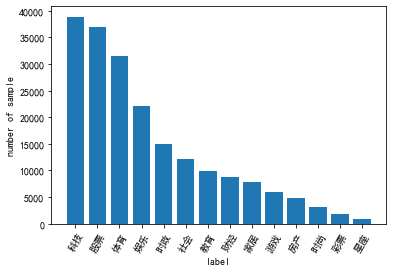

In [21]:
plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签
plt.rcParams['axes.unicode_minus']=False
label_2_index_dict = {'科技': 0, '股票': 1, '体育': 2, '娱乐': 3, '时政': 4, '社会': 5, '教育': 6, '财经': 7, '家居': 8, '游戏': 9, '房产': 10, '时尚': 11, '彩票': 12, '星座': 13}
index_2_label_dict = {v:k for k,v in label_2_index_dict.items()}
plt.figure()
plt.bar(x=range(14),height=np.bincount(df_train['label']))
plt.xlabel("label")
plt.ylabel("number of sample")
plt.xticks(range(14), list(index_2_label_dict.values()),rotation=60)
plt.show()

In [ ]:
df_train['len'] = df_train['text'].apply(lambda x:len(x.))